# Chapter 23: Hybrid Approaches - Variational Classification 
### Qiskit 2.x

We use the parameterized $qiskit4 quantum circuit over two qubits $U_{\phi(\textbf{x})}=ZZFeatureMap$ with repetition two where the parameter are defined by the data by the command $bind\_parameters$ with the two dimensional vector $\textbf{x}$.
The variational quantum circuits that represents the free parameter $\textbf{w}$ that will adapt during  training is the $qiskit$ quantum circuit  $U_{W(\textbf{w})}=TwoLocal$.
The $TwoLocal$ circuit is a parameterized circuit consisting of alternating rotation layers and entanglement layers. The rotation layers are single qubit gates applied on all qubits. The entanglement layer uses two-qubit gates to entangle the qubits according to the definition. In our example we will use the rotation gates $RX$ and $RZ$ and the  entanglement  gate  
controlled $Z$ rotation, $CZ$. with two repetitions resulting in $12$ free parameters. The twelve dimensional vector  $\textbf{w}$  defines the parameters by the  $bind\_parameters$  command. After the operations we measure the two qubits

In [25]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator, Aer
from qiskit.visualization import plot_histogram
import numpy as np
from qiskit.circuit.library import ZZFeatureMap, TwoLocal

x = [0.1, 0.1]
feature_map = ZZFeatureMap(feature_dimension=2, reps=2)
feature_map = feature_map.assign_parameters(x)

weights =np.array([3.28559355, 5.48514978, 5.13099949,
                          0.88372228, 4.08885928, 2.45568528,
                          4.92364593, 5.59032015, 3.66837805,
                          4.84632313, 3.60713748, 2.43546])
two_local = TwoLocal(2, ['ry', 'rz'],'cz', reps=2)
two_local = two_local.assign_parameters(weights)



qc = QuantumCircuit(2,2)
qc.compose(feature_map, inplace=True)
qc.barrier()
qc.compose(two_local, inplace=True)
qc.barrier()
qc.measure(0,0)
qc.measure(1,1)
qc.decompose().draw(fold=130)


┌───┐┌────────┐                       ┌───┐┌────────┐                        ░ ┌────────────┐ ┌───────────┐    »
q_0: ┤ H ├┤ P(0.2) ├──■─────────────────■──┤ H ├┤ P(0.2) ├──■─────────────────■───░─┤ Ry(3.2856) ├─┤ Rz(5.131) ├──■─»
     ├───┤├────────┤┌─┴─┐┌───────────┐┌─┴─┐├───┤├────────┤┌─┴─┐┌───────────┐┌─┴─┐ ░ ├────────────┤┌┴───────────┴┐ │ »
q_1: ┤ H ├┤ P(0.2) ├┤ X ├┤ P(18.503) ├┤ X ├┤ H ├┤ P(0.2) ├┤ X ├┤ P(18.503) ├┤ X ├─░─┤ Ry(5.4851) ├┤ Rz(0.88372) ├─■─»
     └───┘└────────┘└───┘└───────────┘└───┘└───┘└────────┘└───┘└───────────┘└───┘ ░ └────────────┘└─────────────┘   »
c: 2/═══════════════════════════════════════════════════════════════════════════════════════════════════════════════»
                                                                                                                    »
«     ┌────────────┐┌────────────┐   ┌────────────┐┌────────────┐ ░ ┌─┐   
«q_0: ┤ Ry(4.0889) ├┤ Rz(4.9236) ├─■─┤ Ry(3.6684) ├┤ Rz(3.6071) ├─░─┤M├───
«     ├────────────┤├────────────┤ │ ├────────────┤├────────────┤ ░ └╥┘┌─┐
«q_1: ┤ Ry(2.4557) ├┤ Rz(5.5903) ├─■─┤ Ry(4.8463) ├┤ Rz(2.4355) ├─░──╫─┤M├
«     └────────────┘└────────────┘   └────────────┘└────────────┘ ░  ║ └╥┘
«c: 2/═══════════════════════════════════════════════════════════════╩══╩═
«                                                                    0  1


Total count are: {'11': 1920, '10': 1837, '00': 713, '01': 5530}


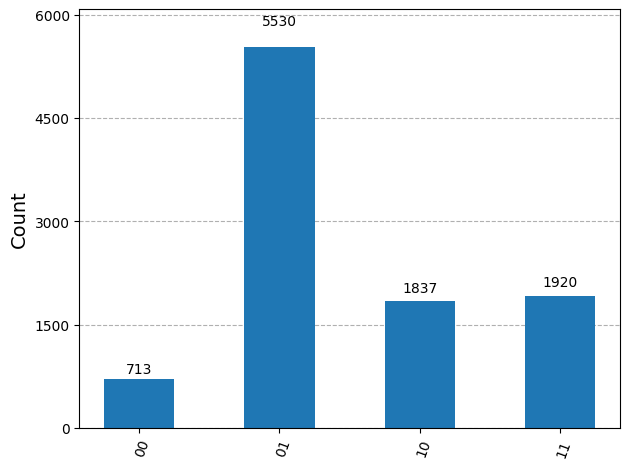

In [26]:
simulator = Aer.get_backend('qasm_simulator')
result=simulator.run(qc.decompose(),shots=10000).result()
counts = result.get_counts()
print("\nTotal count are:",counts)
plot_histogram(counts)